In [1]:
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))

In [2]:
columns <- c(
    "Metadata_treatment",
    "Metadata_Well",
    "Metadata_number_of_singlecells",	
    "Metadata_FOV",
    "Metadata_treatment1",	
    "Metadata_Time",
    "Metadata_treatment2",
    "Metadata_treatment1_dose",	
    "Metadata_treatment1_unit",	
    'Metadata_treatment2_dose',	
    "Metadata_treatment2_unit",	
    "Metadata_serum",
    "Metadata_ImageNumber",	
    "Metadata_Cells_Number_Object_Number",	
    "Metadata_Cytoplasm_Parent_Cells",
    "Metadata_Cytoplasm_Parent_Nuclei",	
    "Metadata_ImageNumber_1",
    "Metadata_ImageNumber_2",	
    "Metadata_ImageNumber_3",	
    "Metadata_Nuclei_Number_Object_Number"
)

In [3]:
df <- file.path("../../4.processing_profiled_features/data/preprocessed_data/live_cell_pyroptosis_wave1_sc_first_time_norm_fs.parquet")

df <- arrow::read_parquet(df,col_select = columns)
df$well_fov <- paste0(df$Metadata_Well, "_", df$Metadata_FOV)
df$unique_cell <- paste0(df$Metadata_Time, "_", df$well_fov, "_", df$Metadata_ImageNumber, "_", df$Metadata_Nuclei_Number_Object_Number)
df$unique_well <- paste0(df$well_fov, "_", df$Metadata_treatment)
# show all columns in a jupyter notebooks
print(dim(df))
head(df)

Warning message:
“Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(columns)

  # Now:
  data %>% select(all_of(columns))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.”


[1] 3820888      23


Metadata_treatment,Metadata_Well,Metadata_number_of_singlecells,Metadata_FOV,Metadata_treatment1,Metadata_Time,Metadata_treatment2,Metadata_treatment1_dose,Metadata_treatment1_unit,Metadata_treatment2_dose,⋯,Metadata_Cells_Number_Object_Number,Metadata_Cytoplasm_Parent_Cells,Metadata_Cytoplasm_Parent_Nuclei,Metadata_ImageNumber_1,Metadata_ImageNumber_2,Metadata_ImageNumber_3,Metadata_Nuclei_Number_Object_Number,well_fov,unique_cell,unique_well
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Ab1-42 0.4 uM,N11,652,0002,Ab1-42,01,NA,0.4,uM,NA,⋯,1,1,1,2,2,2,1,N11_0002,01_N11_0002_2_1,N11_0002_Ab1-42 0.4 uM
Ab1-42 0.4 uM,N11,652,0002,Ab1-42,01,NA,0.4,uM,NA,⋯,2,2,3,2,2,2,3,N11_0002,01_N11_0002_2_3,N11_0002_Ab1-42 0.4 uM
Ab1-42 0.4 uM,N11,652,0002,Ab1-42,01,NA,0.4,uM,NA,⋯,3,3,4,2,2,2,4,N11_0002,01_N11_0002_2_4,N11_0002_Ab1-42 0.4 uM
Ab1-42 0.4 uM,N11,652,0002,Ab1-42,01,NA,0.4,uM,NA,⋯,4,4,5,2,2,2,5,N11_0002,01_N11_0002_2_5,N11_0002_Ab1-42 0.4 uM
Ab1-42 0.4 uM,N11,652,0002,Ab1-42,01,NA,0.4,uM,NA,⋯,5,5,7,2,2,2,7,N11_0002,01_N11_0002_2_7,N11_0002_Ab1-42 0.4 uM
Ab1-42 0.4 uM,N11,652,0002,Ab1-42,01,NA,0.4,uM,NA,⋯,6,6,19,2,2,2,19,N11_0002,01_N11_0002_2_19,N11_0002_Ab1-42 0.4 uM


In [4]:
unique(df$Metadata_treatment)

[1] "Ab1-42 0.4 uM"                  "DMSO CTL"                      
 [3] "H2O2 100 uM"                    "Flagellin 0.1 ug/ml"           
 [5] "H2O2 100 nM"                    "Flagellin 1 ug/ml"             
 [7] "LPS 1 ug/ml + Nigericin 3uM"    "Thapsigargin 10 uM"            
 [9] "H2O2 500 uM"                    "Media"                         
[11] "LPS 1 ug/ml + Nigericin 5uM"    "Thapsigargin 1 uM"             
[13] "LPS 1 ug/ml + Nigericin 0.5uM"  "Ab1-42 2 uM"                   
[15] "Ab1-42 10 uM"                   "LPS 10 ug/ml"                  
[17] "Flagellin 10 ug/ml"             "LPS 1 ug/ml + Nigericin 1 uM"  
[19] "LPS 1 ug/ml"                    "LPS 1 ug/ml + ATP 2.5 mM"      
[21] "LPS 0.1 ug/ml"                  "Thapsigargin 0.5uM"            
[23] "LPS 1 ug/ml + Nigericin 0.1 uM"

In [4]:
# map the timepoints to the actual hour timepoint
timepoints <- data.frame(
    reference = c("00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17"),
    Metadata_timepoint  = c(1,4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,90)
)
# map the timepoints to the main df 
df <- df %>% left_join(timepoints, by = c("Metadata_Time" = "reference"))
head(df)

Metadata_treatment,Metadata_Well,Metadata_number_of_singlecells,Metadata_FOV,Metadata_treatment1,Metadata_Time,Metadata_treatment2,Metadata_treatment1_dose,Metadata_treatment1_unit,Metadata_treatment2_dose,⋯,Metadata_Cytoplasm_Parent_Cells,Metadata_Cytoplasm_Parent_Nuclei,Metadata_ImageNumber_1,Metadata_ImageNumber_2,Metadata_ImageNumber_3,Metadata_Nuclei_Number_Object_Number,well_fov,unique_cell,unique_well,Metadata_timepoint
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
Ab1-42 0.4 uM,N11,652,0002,Ab1-42,01,NA,0.4,uM,NA,⋯,1,1,2,2,2,1,N11_0002,01_N11_0002_2_1,N11_0002_Ab1-42 0.4 uM,4
Ab1-42 0.4 uM,N11,652,0002,Ab1-42,01,NA,0.4,uM,NA,⋯,2,3,2,2,2,3,N11_0002,01_N11_0002_2_3,N11_0002_Ab1-42 0.4 uM,4
Ab1-42 0.4 uM,N11,652,0002,Ab1-42,01,NA,0.4,uM,NA,⋯,3,4,2,2,2,4,N11_0002,01_N11_0002_2_4,N11_0002_Ab1-42 0.4 uM,4
Ab1-42 0.4 uM,N11,652,0002,Ab1-42,01,NA,0.4,uM,NA,⋯,4,5,2,2,2,5,N11_0002,01_N11_0002_2_5,N11_0002_Ab1-42 0.4 uM,4
Ab1-42 0.4 uM,N11,652,0002,Ab1-42,01,NA,0.4,uM,NA,⋯,5,7,2,2,2,7,N11_0002,01_N11_0002_2_7,N11_0002_Ab1-42 0.4 uM,4
Ab1-42 0.4 uM,N11,652,0002,Ab1-42,01,NA,0.4,uM,NA,⋯,6,19,2,2,2,19,N11_0002,01_N11_0002_2_19,N11_0002_Ab1-42 0.4 uM,4


In [5]:
# get the cell counts per well per time
cell_counts <- df %>% 
  group_by(unique_well,Metadata_treatment, Metadata_timepoint) %>% 
  # get the unique cell count per well per time
    summarise(cell_count = n_distinct(unique_cell)) %>%
    ungroup()

head(cell_counts)

`summarise()` has grouped output by 'unique_well', 'Metadata_treatment'. You
can override using the `.groups` argument.


unique_well,Metadata_treatment,Metadata_timepoint,cell_count
<chr>,<chr>,<dbl>,<int>
C04_0001_Media,Media,1,479
C04_0001_Media,Media,4,527
C04_0001_Media,Media,7,490
C04_0001_Media,Media,10,510
C04_0001_Media,Media,13,506
C04_0001_Media,Media,16,517


In [6]:
unique(cell_counts$Metadata_treatment)

cell_counts$Metadata_treatment <- factor(cell_counts$Metadata_treatment, levels=c(
    'DMSO CTL',
    'Media',
    'Ab1-42 0.4 uM',
    'Ab1-42 2 uM',
    'Ab1-42 10 uM',
    'Flagellin 0.1 ug/ml',
    'Flagellin 1 ug/ml',
    'Flagellin 10 ug/ml',
    'H2O2 100 nM',
    'H2O2 100 uM',
    'H2O2 500 uM',
    'LPS 0.1 ug/ml',
    'LPS 1 ug/ml',
    'LPS 1 ug/ml + ATP 2.5 mM',
    'LPS 1 ug/ml + Nigericin 0.1 uM',
    'LPS 1 ug/ml + Nigericin 0.5uM',
    'LPS 1 ug/ml + Nigericin 1 uM',
    'LPS 1 ug/ml + Nigericin 3uM',
    'LPS 1 ug/ml + Nigericin 5uM',
    'LPS 10 ug/ml',
    'Thapsigargin 0.5uM',
    'Thapsigargin 1 uM',
    'Thapsigargin 10 uM'
))
unique(cell_counts$Metadata_treatment)

[1] "Media"                          "DMSO CTL"                      
 [3] "LPS 10 ug/ml"                   "Thapsigargin 10 uM"            
 [5] "LPS 1 ug/ml"                    "Thapsigargin 1 uM"             
 [7] "LPS 0.1 ug/ml"                  "Thapsigargin 0.5uM"            
 [9] "LPS 1 ug/ml + ATP 2.5 mM"       "LPS 1 ug/ml + Nigericin 5uM"   
[11] "Flagellin 10 ug/ml"             "LPS 1 ug/ml + Nigericin 3uM"   
[13] "Flagellin 1 ug/ml"              "LPS 1 ug/ml + Nigericin 1 uM"  
[15] "Flagellin 0.1 ug/ml"            "LPS 1 ug/ml + Nigericin 0.5uM" 
[17] "H2O2 500 uM"                    "LPS 1 ug/ml + Nigericin 0.1 uM"
[19] "H2O2 100 uM"                    "Ab1-42 10 uM"                  
[21] "H2O2 100 nM"                    "Ab1-42 2 uM"                   
[23] "Ab1-42 0.4 uM"

[1] Media                          DMSO CTL                      
 [3] LPS 10 ug/ml                   Thapsigargin 10 uM            
 [5] LPS 1 ug/ml                    Thapsigargin 1 uM             
 [7] LPS 0.1 ug/ml                  Thapsigargin 0.5uM            
 [9] LPS 1 ug/ml + ATP 2.5 mM       LPS 1 ug/ml + Nigericin 5uM   
[11] Flagellin 10 ug/ml             LPS 1 ug/ml + Nigericin 3uM   
[13] Flagellin 1 ug/ml              LPS 1 ug/ml + Nigericin 1 uM  
[15] Flagellin 0.1 ug/ml            LPS 1 ug/ml + Nigericin 0.5uM 
[17] H2O2 500 uM                    LPS 1 ug/ml + Nigericin 0.1 uM
[19] H2O2 100 uM                    Ab1-42 10 uM                  
[21] H2O2 100 nM                    Ab1-42 2 uM                   
[23] Ab1-42 0.4 uM                 
23 Levels: DMSO CTL Media Ab1-42 0.4 uM Ab1-42 2 uM ... Thapsigargin 10 uM

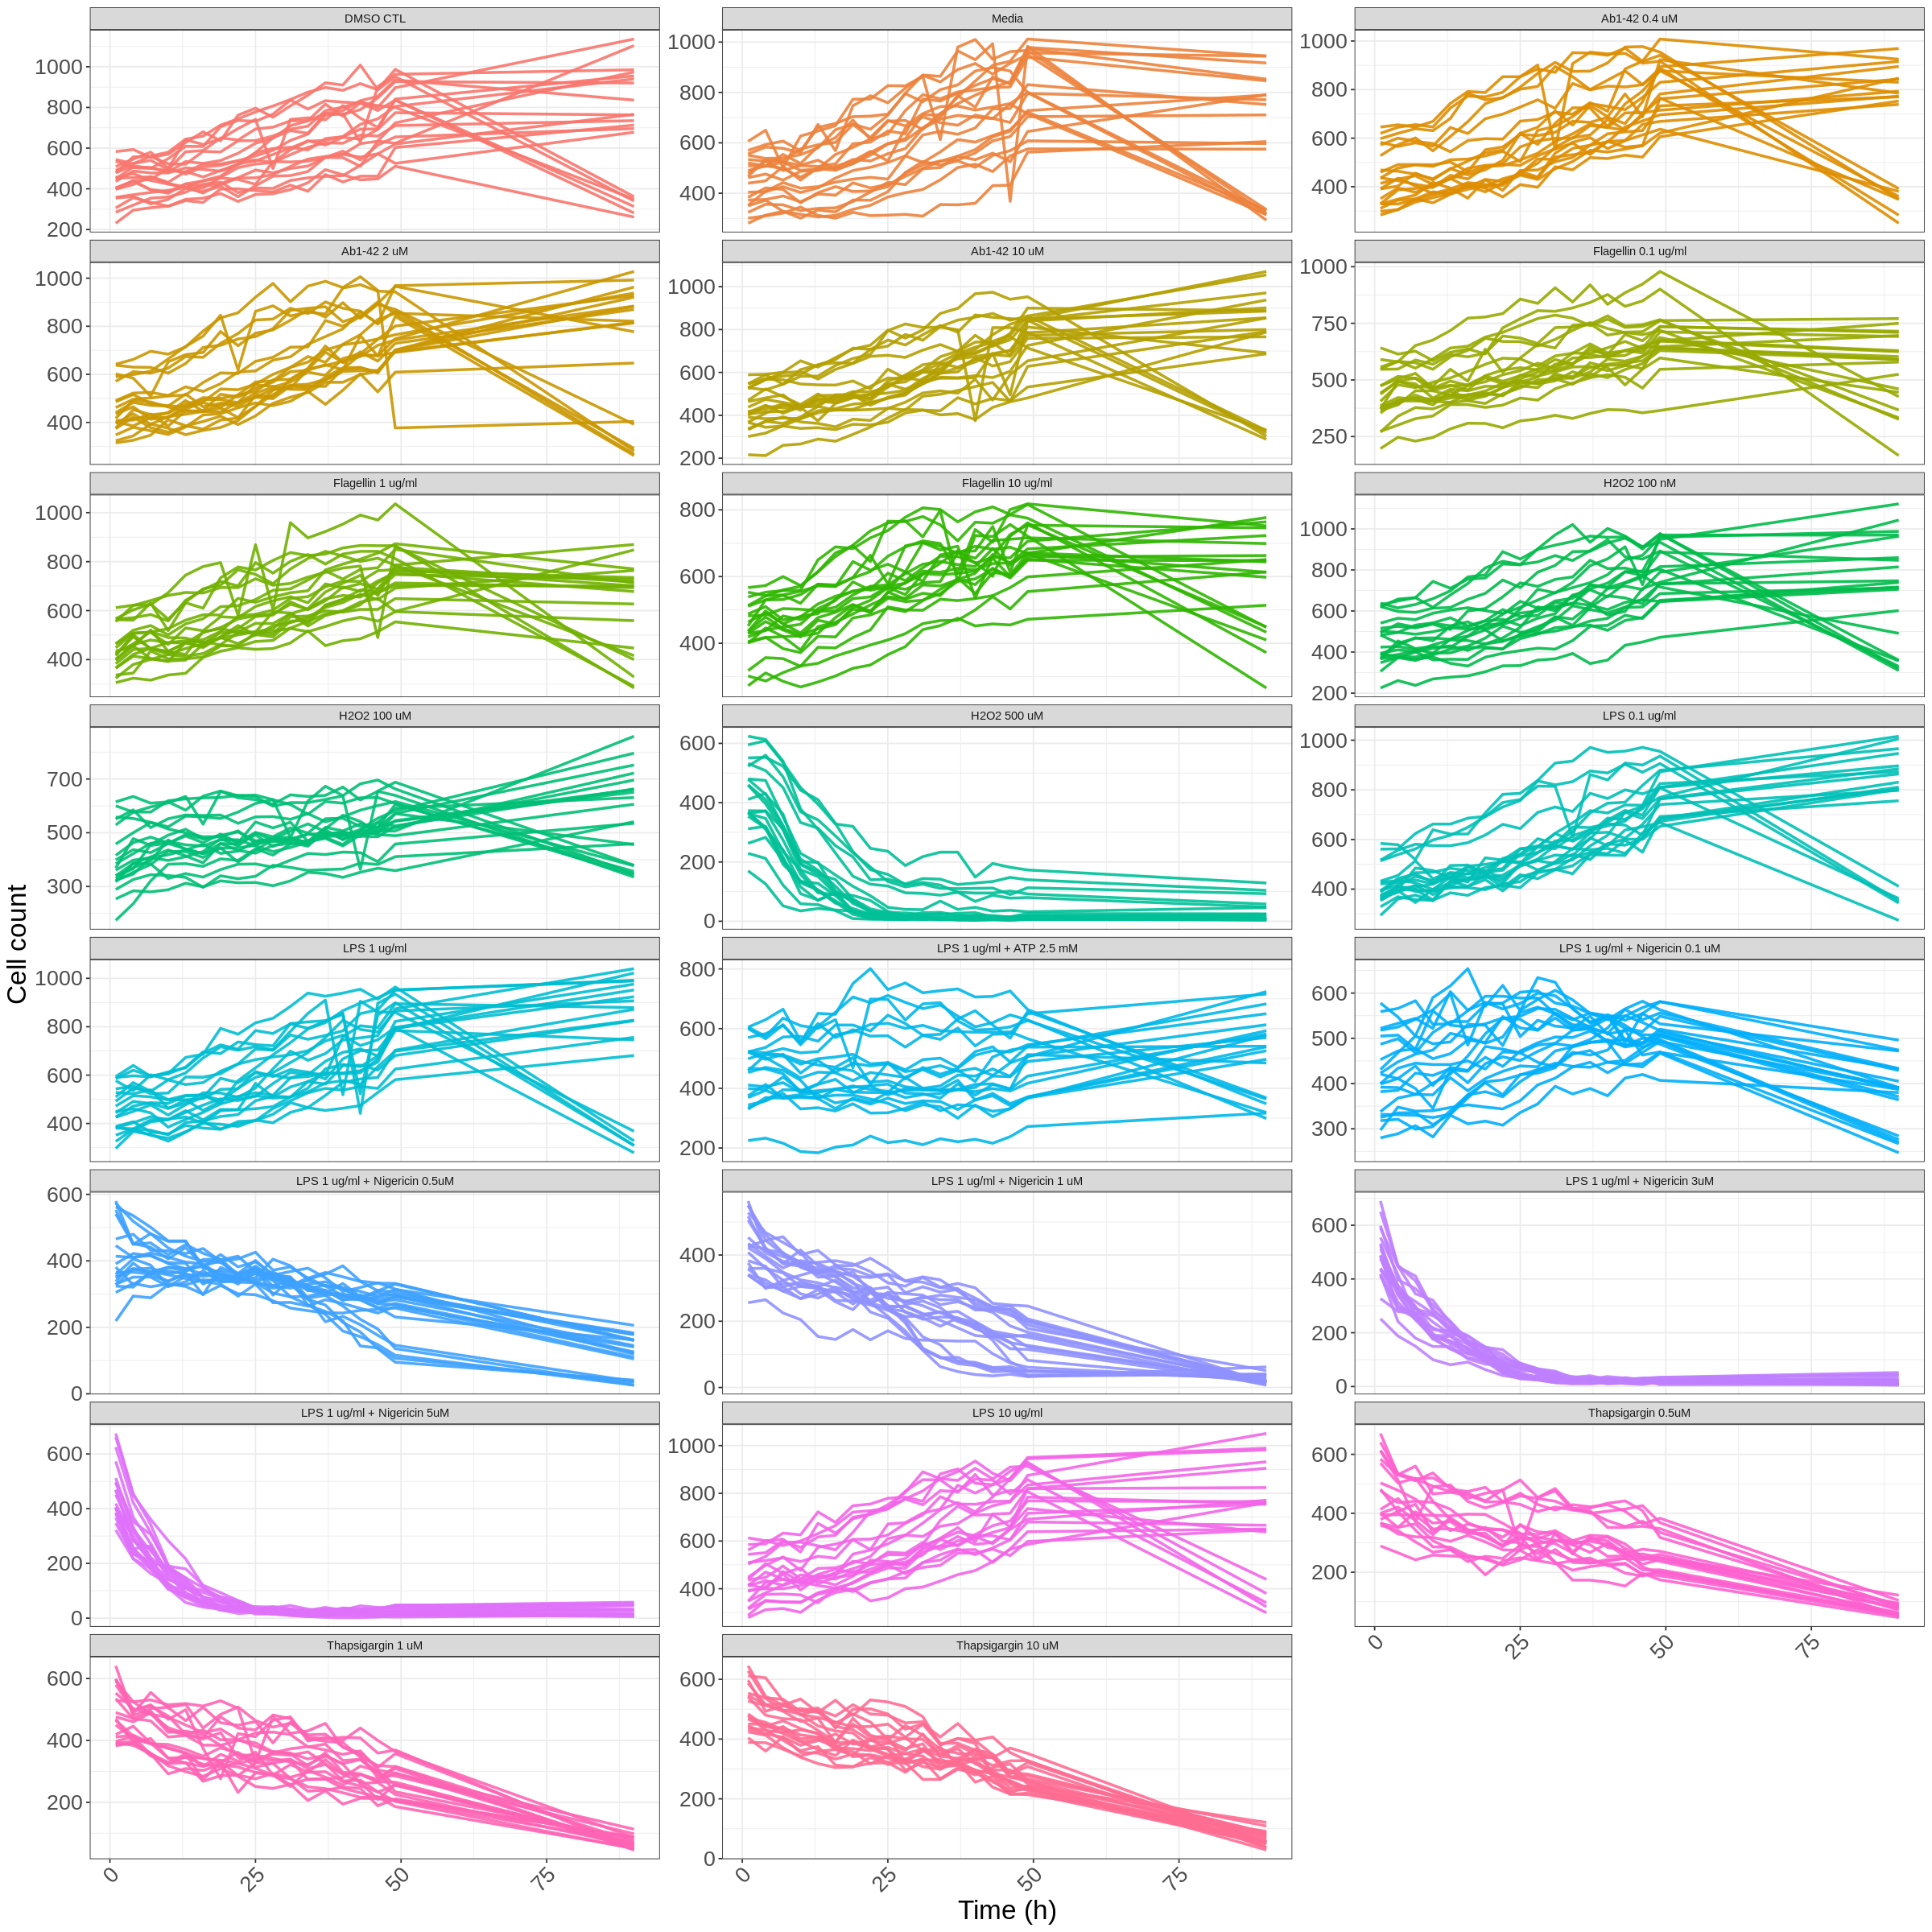

In [ ]:
width <- 20
height <- 20
options(repr.plot.width=width, repr.plot.height=height)
# plot the timelapse _profiles for a given feature 
timelapse_plot <- (
    # group the timepoints by the feature
    ggplot(cell_counts, aes(x=Metadata_timepoint, y=cell_count), fill=Metadata_treatment)
    + geom_line(aes(group=unique_well, color=Metadata_treatment), alpha=0.9, linewidth=1)
    # add a sd ribbon to the plot
    
    + theme_bw()

    + theme(
        axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
        axis.text.y = element_text(size = 16),
        axis.title = element_text(size = 20),
        legend.title = element_text(size = 20),
        legend.text = element_text(size = 16),
        legend.position = "none"
    )
    + labs(
        x = "Time (h)",
        y = "Cell count"
    )
    + facet_wrap(~Metadata_treatment, scales="free_y", ncol=3)
)
timelapse_plot

# save the plot
ggsave(file.path("../figures","cell_count_timelapse.png"), timelapse_plot, width=width, height=height, dpi=600)